# Exercice 1

In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering, SpectralClustering

import seaborn as sns

In [44]:
data_wine = datasets.load_wine(as_frame=True)
X = np.array(data_wine.data)
y = np.array(data_wine.target)

# Centering & Scaling
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [46]:
def distance_matrix(X):
    n = X.shape[0]
    D =  np.zeros((n,n))
    for i in range(n):
        for j in range(i+1,n):
            D[i,j] = np.sqrt(sum(np.power(X[i,:] - X[j,:],2)))
            D[j,i] = D[i,j]
    return D

In [48]:
D=distance_matrix(X)
print(D)

[[0.         3.49753522 3.02660794 ... 6.4909413  6.07878091 7.18442107]
 [3.49753522 0.         4.1429119  ... 6.39689969 6.09492714 7.36771922]
 [3.02660794 4.1429119  0.         ... 6.25367723 5.85179331 6.35388503]
 ...
 [6.4909413  6.39689969 6.25367723 ... 0.         1.82621785 3.39251526]
 [6.07878091 6.09492714 5.85179331 ... 1.82621785 0.         3.32427633]
 [7.18442107 7.36771922 6.35388503 ... 3.39251526 3.32427633 0.        ]]


You can observe with different values of parameters for DBSCAN that it is hard to calibrate.

In [51]:
n_clust = 3

kmean_clf = KMeans(n_clusters=n_clust) 
dbscan_clf = DBSCAN(eps=2.1,min_samples=5) 
hierarchical_clf = AgglomerativeClustering(n_clusters=n_clust)
spectral_clf = SpectralClustering(n_clusters=n_clust,affinity='nearest_neighbors')

In [53]:
kmean_clf.fit(X)
dbscan_clf.fit(X)
hierarchical_clf.fit(X)
spectral_clf.fit(X)

/Users/mounir/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


SpectralClustering(affinity='nearest_neighbors', n_clusters=3)

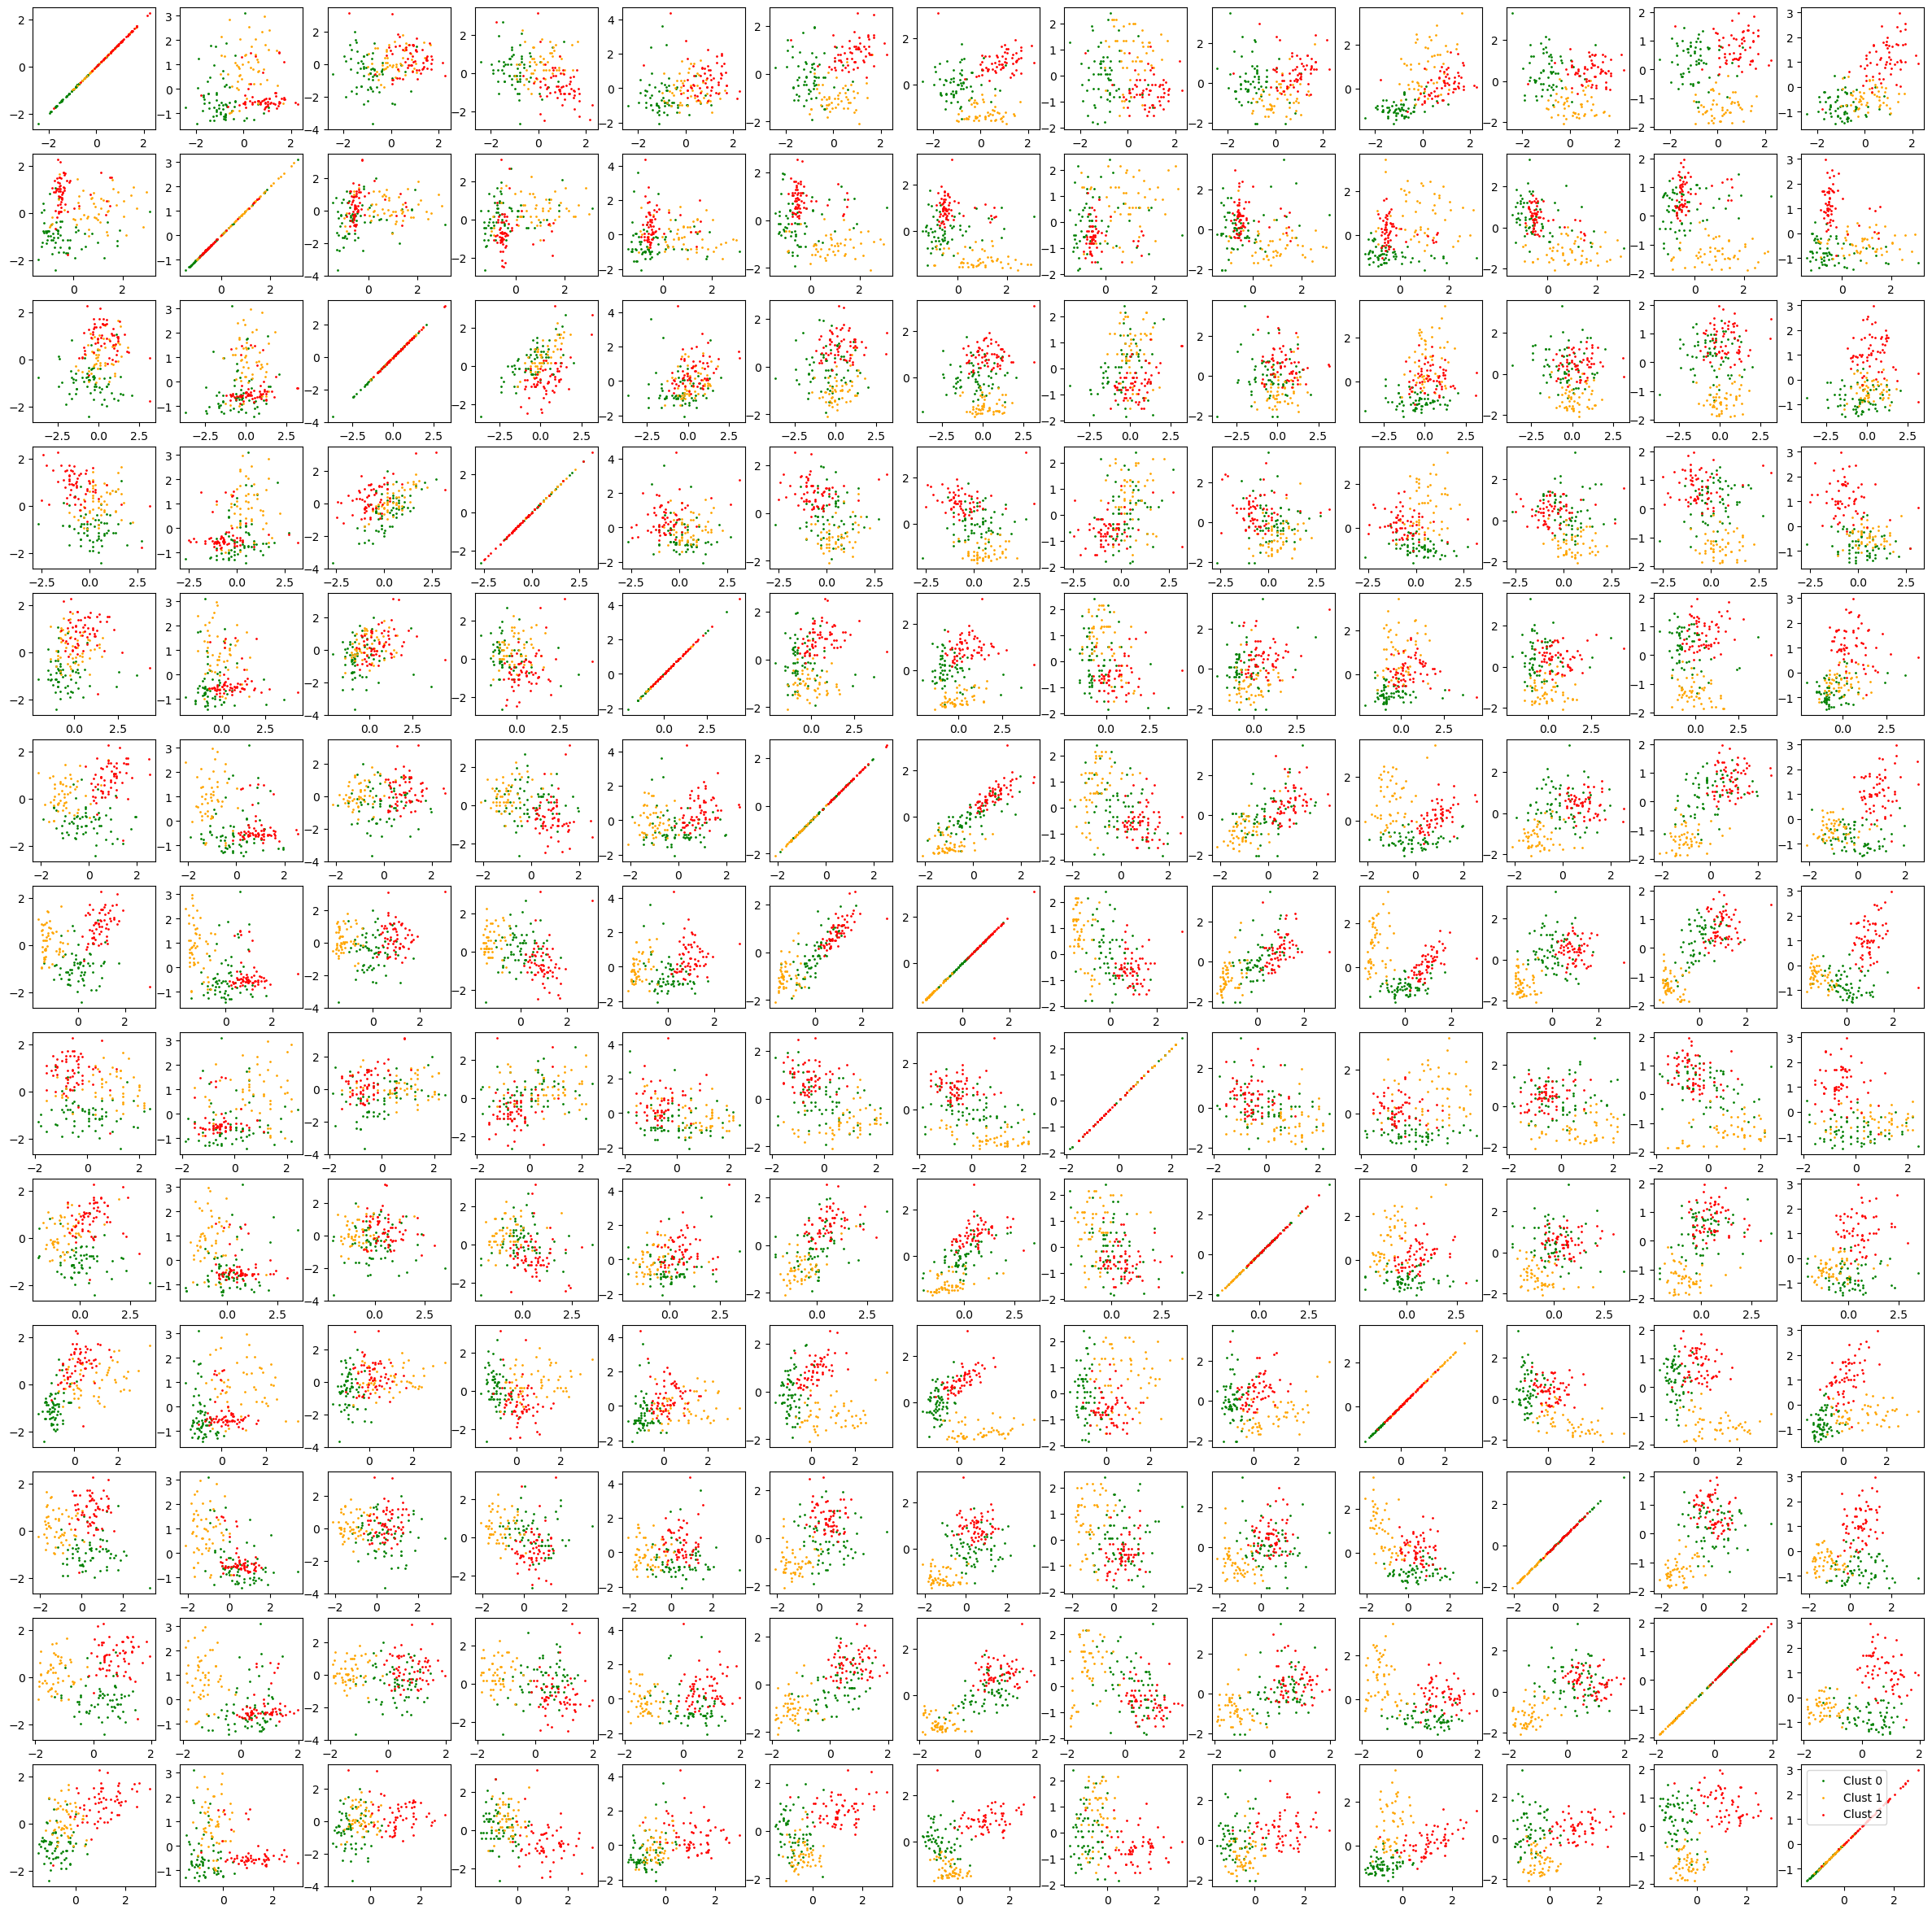

In [55]:
N_p = 13
fig, axis = plt.subplots(nrows=N_p, ncols=N_p,figsize=(30,30))
color = ['green', 'orange', 'red']
for i in range(N_p):
    for j in range(N_p):
        for c in range(3):
            axis[i,j].scatter(X[kmean_clf.labels_==c,i],X[kmean_clf.labels_==c,j],s=1,label='Clust '+str(c),color=color[c])
plt.legend()
plt.show()

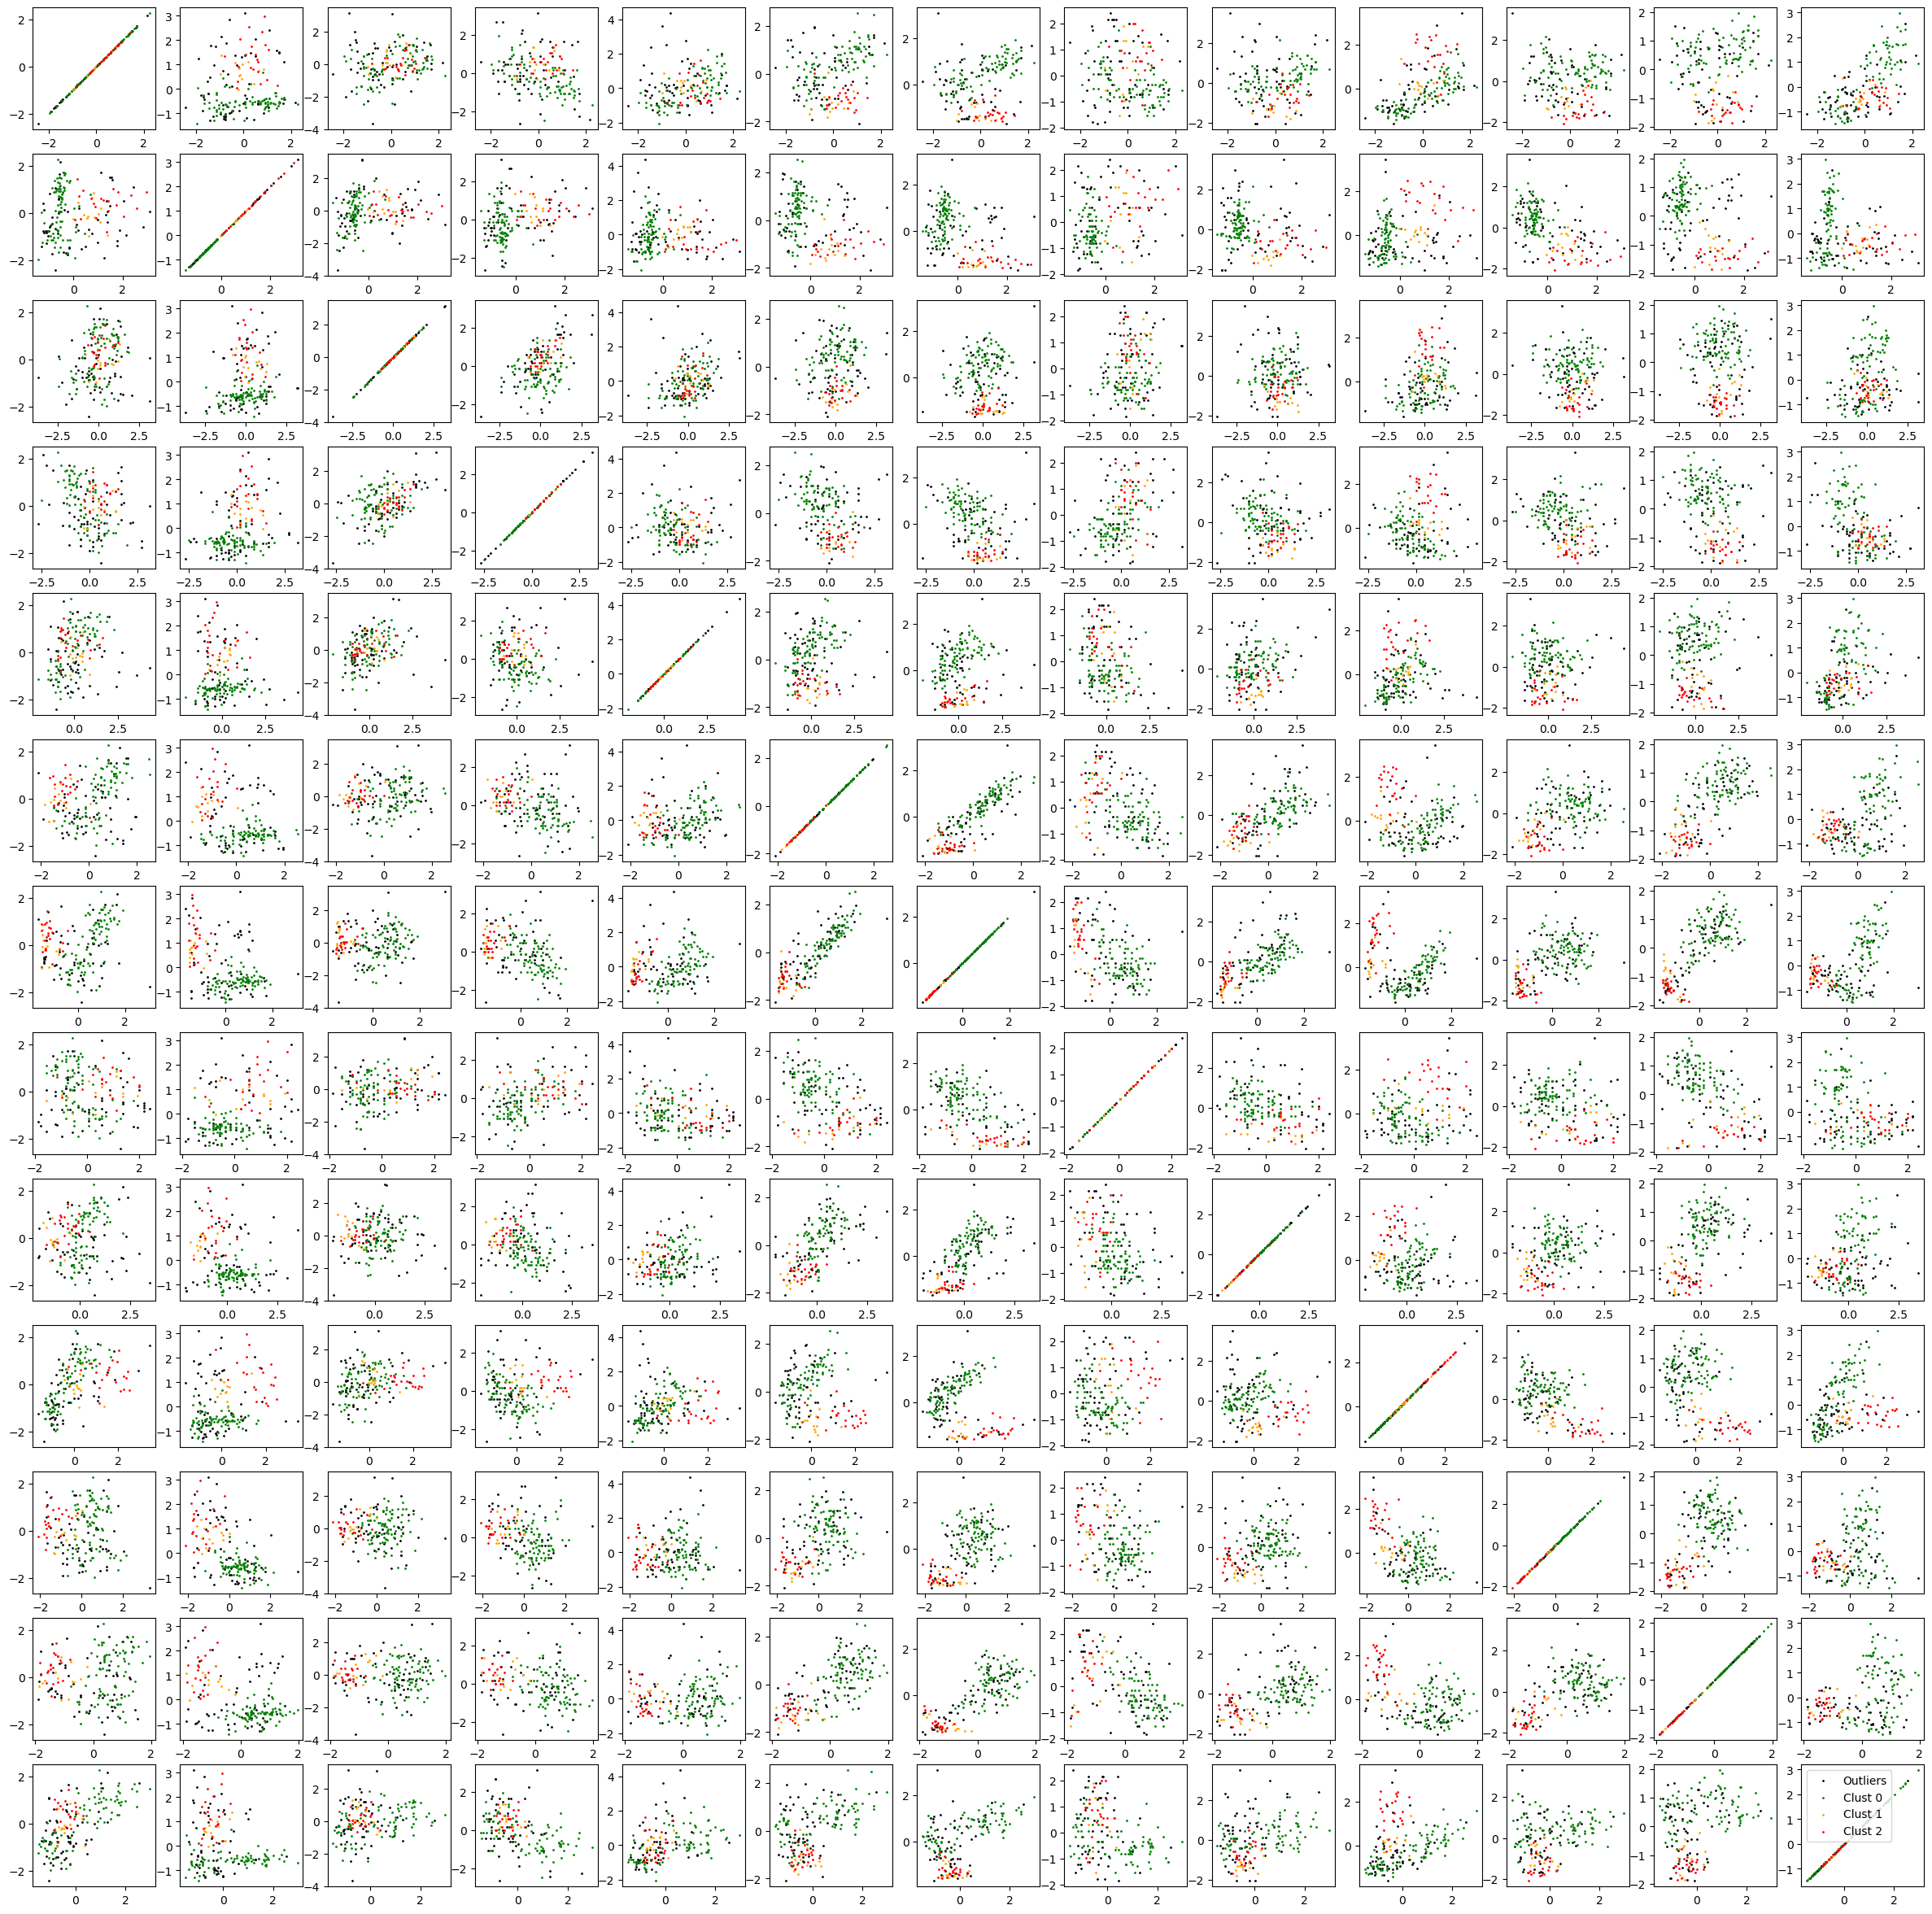

In [57]:
N_p = 13
fig, axis = plt.subplots(nrows=N_p, ncols=N_p,figsize=(30,30))
color = ['green', 'orange', 'red']
for i in range(N_p):
    for j in range(N_p):
        #Outliers :
        axis[i,j].scatter(X[dbscan_clf.labels_==-1,i],X[dbscan_clf.labels_==-1,j],s=1,label='Outliers',color='black')
        for c in range(3):
            axis[i,j].scatter(X[dbscan_clf.labels_==c,i],X[dbscan_clf.labels_==c,j],s=1,label='Clust '+str(c),color=color[c])
plt.legend()
plt.show()

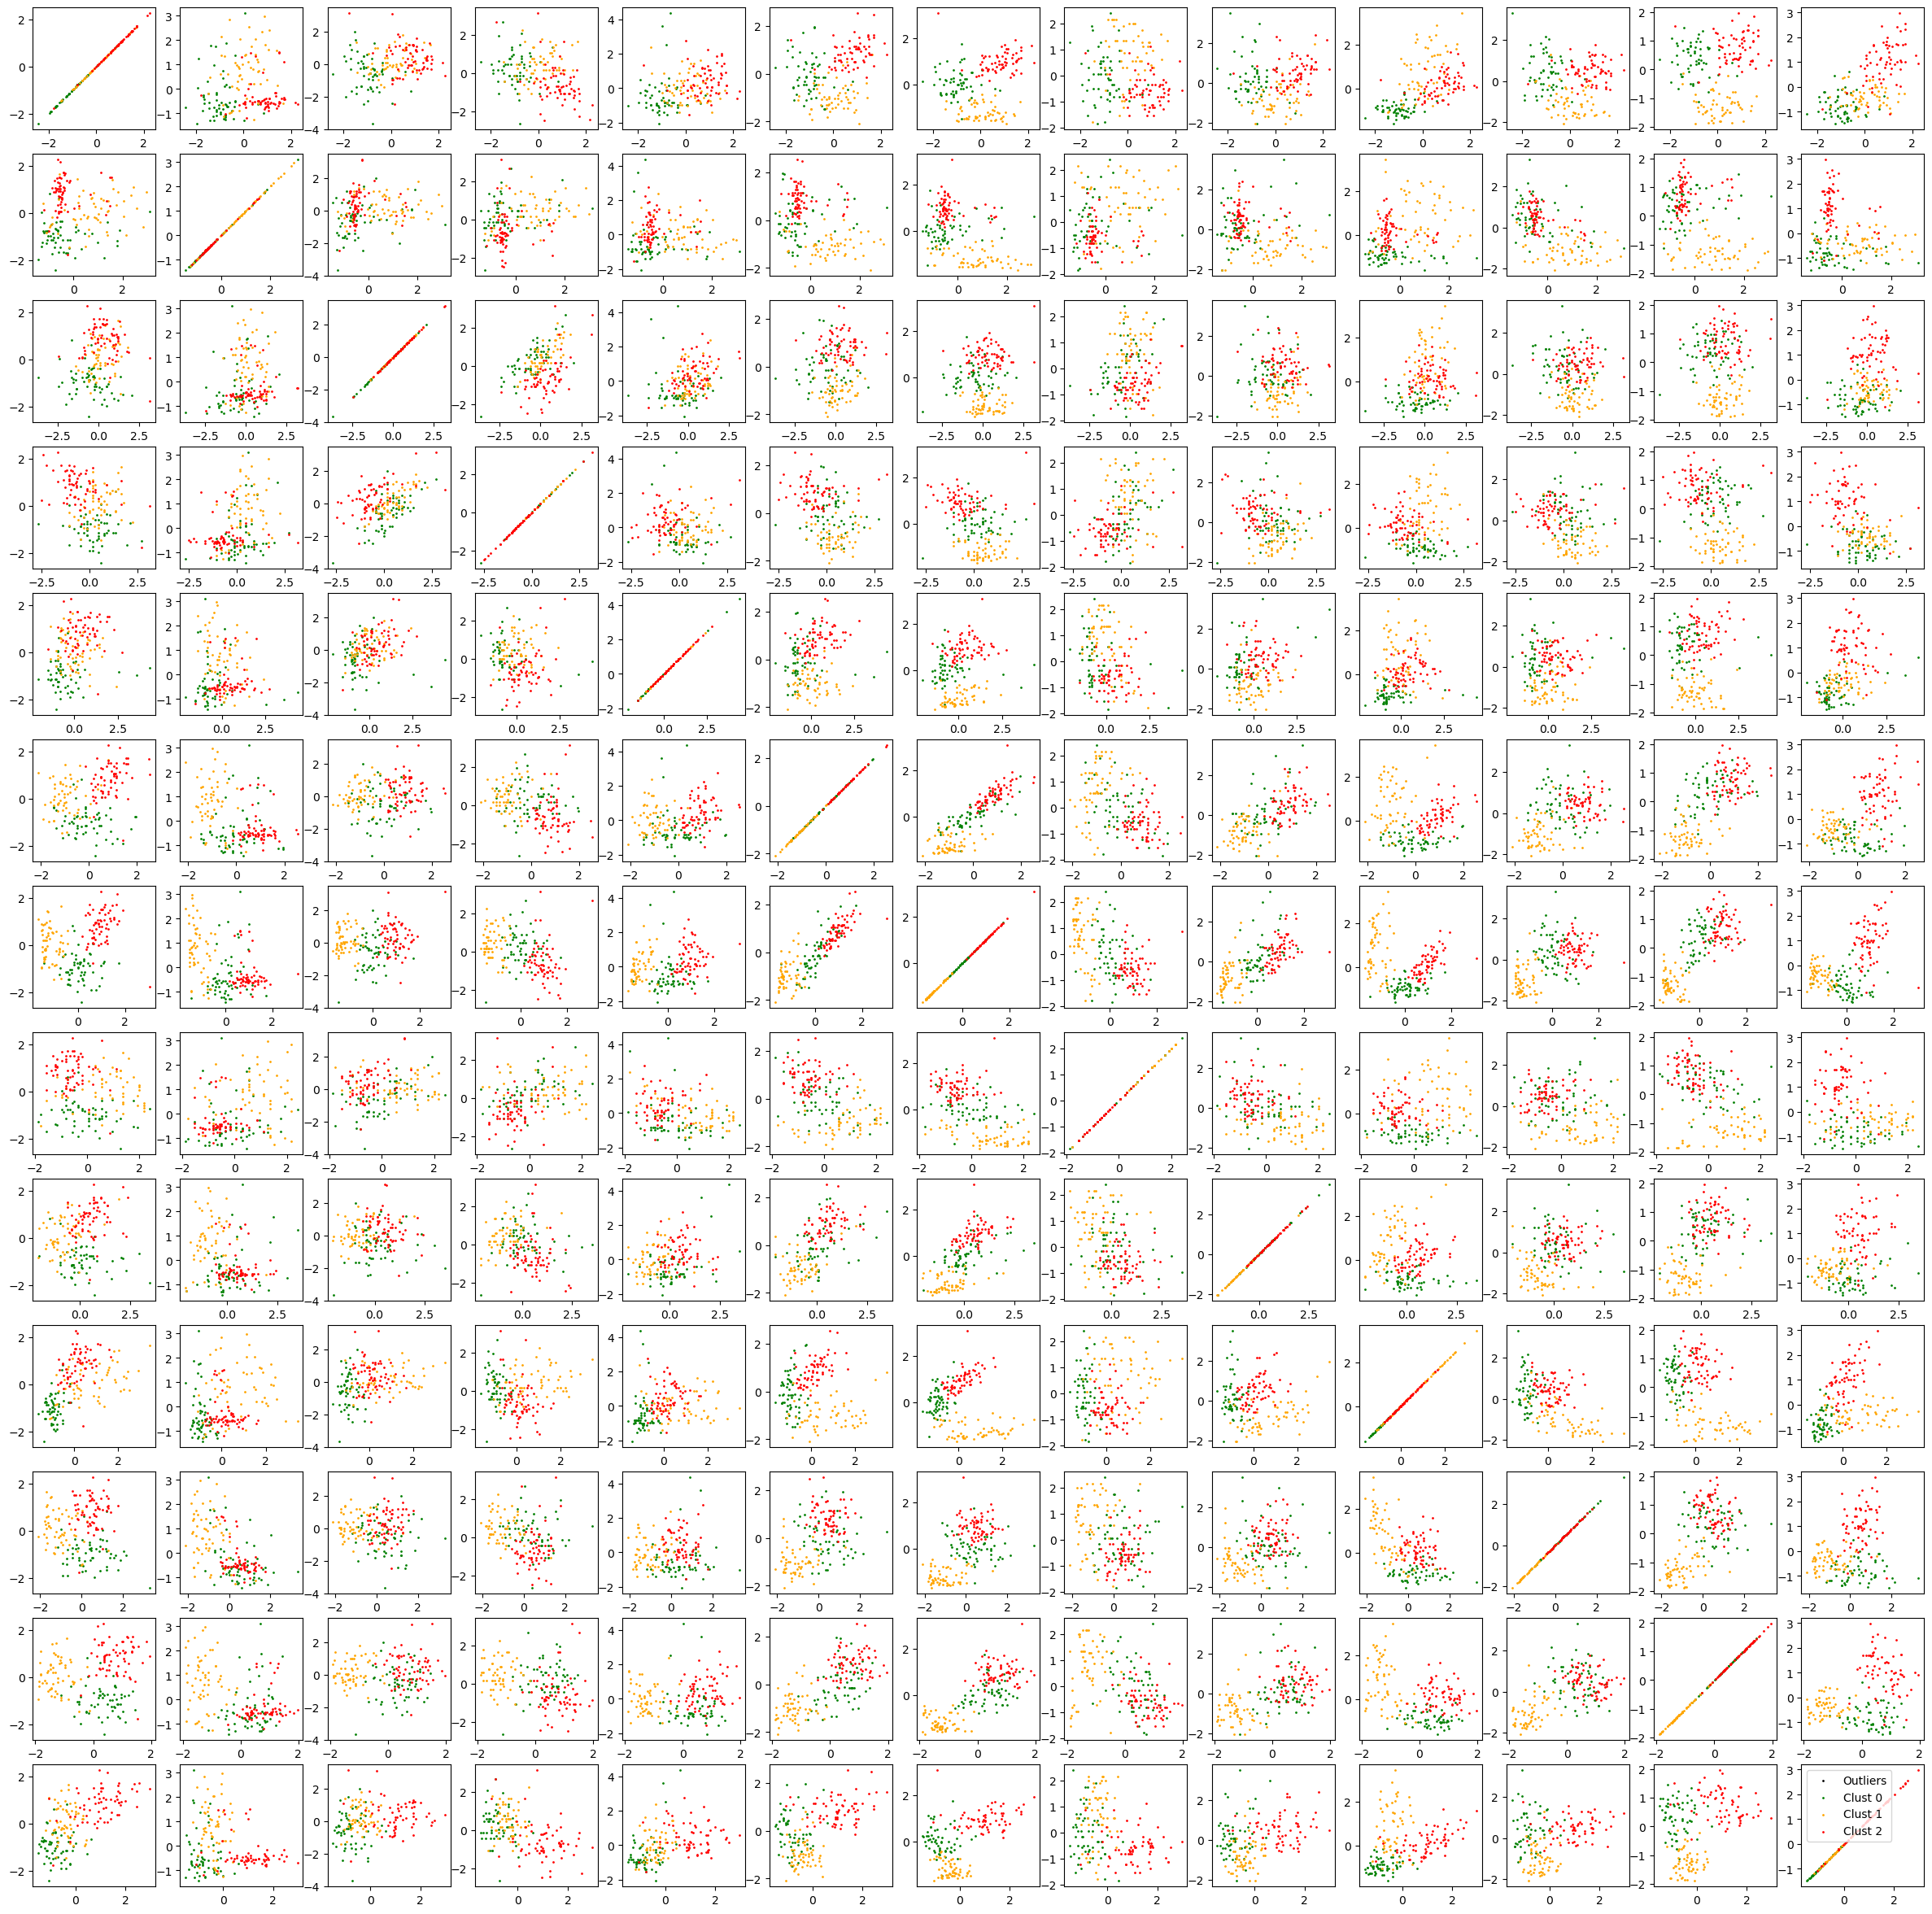

In [59]:
N_p = 13
fig, axis = plt.subplots(nrows=N_p, ncols=N_p,figsize=(30,30))
color = ['green', 'orange', 'red']
for i in range(N_p):
    for j in range(N_p):
        #Outliers :
        axis[i,j].scatter(X[hierarchical_clf.labels_==-1,i],X[hierarchical_clf.labels_==-1,j],s=1,label='Outliers',color='black')
        for c in range(3):
            axis[i,j].scatter(X[hierarchical_clf.labels_==c,i],X[hierarchical_clf.labels_==c,j],s=1,label='Clust '+str(c),color=color[c])
plt.legend()
plt.show()

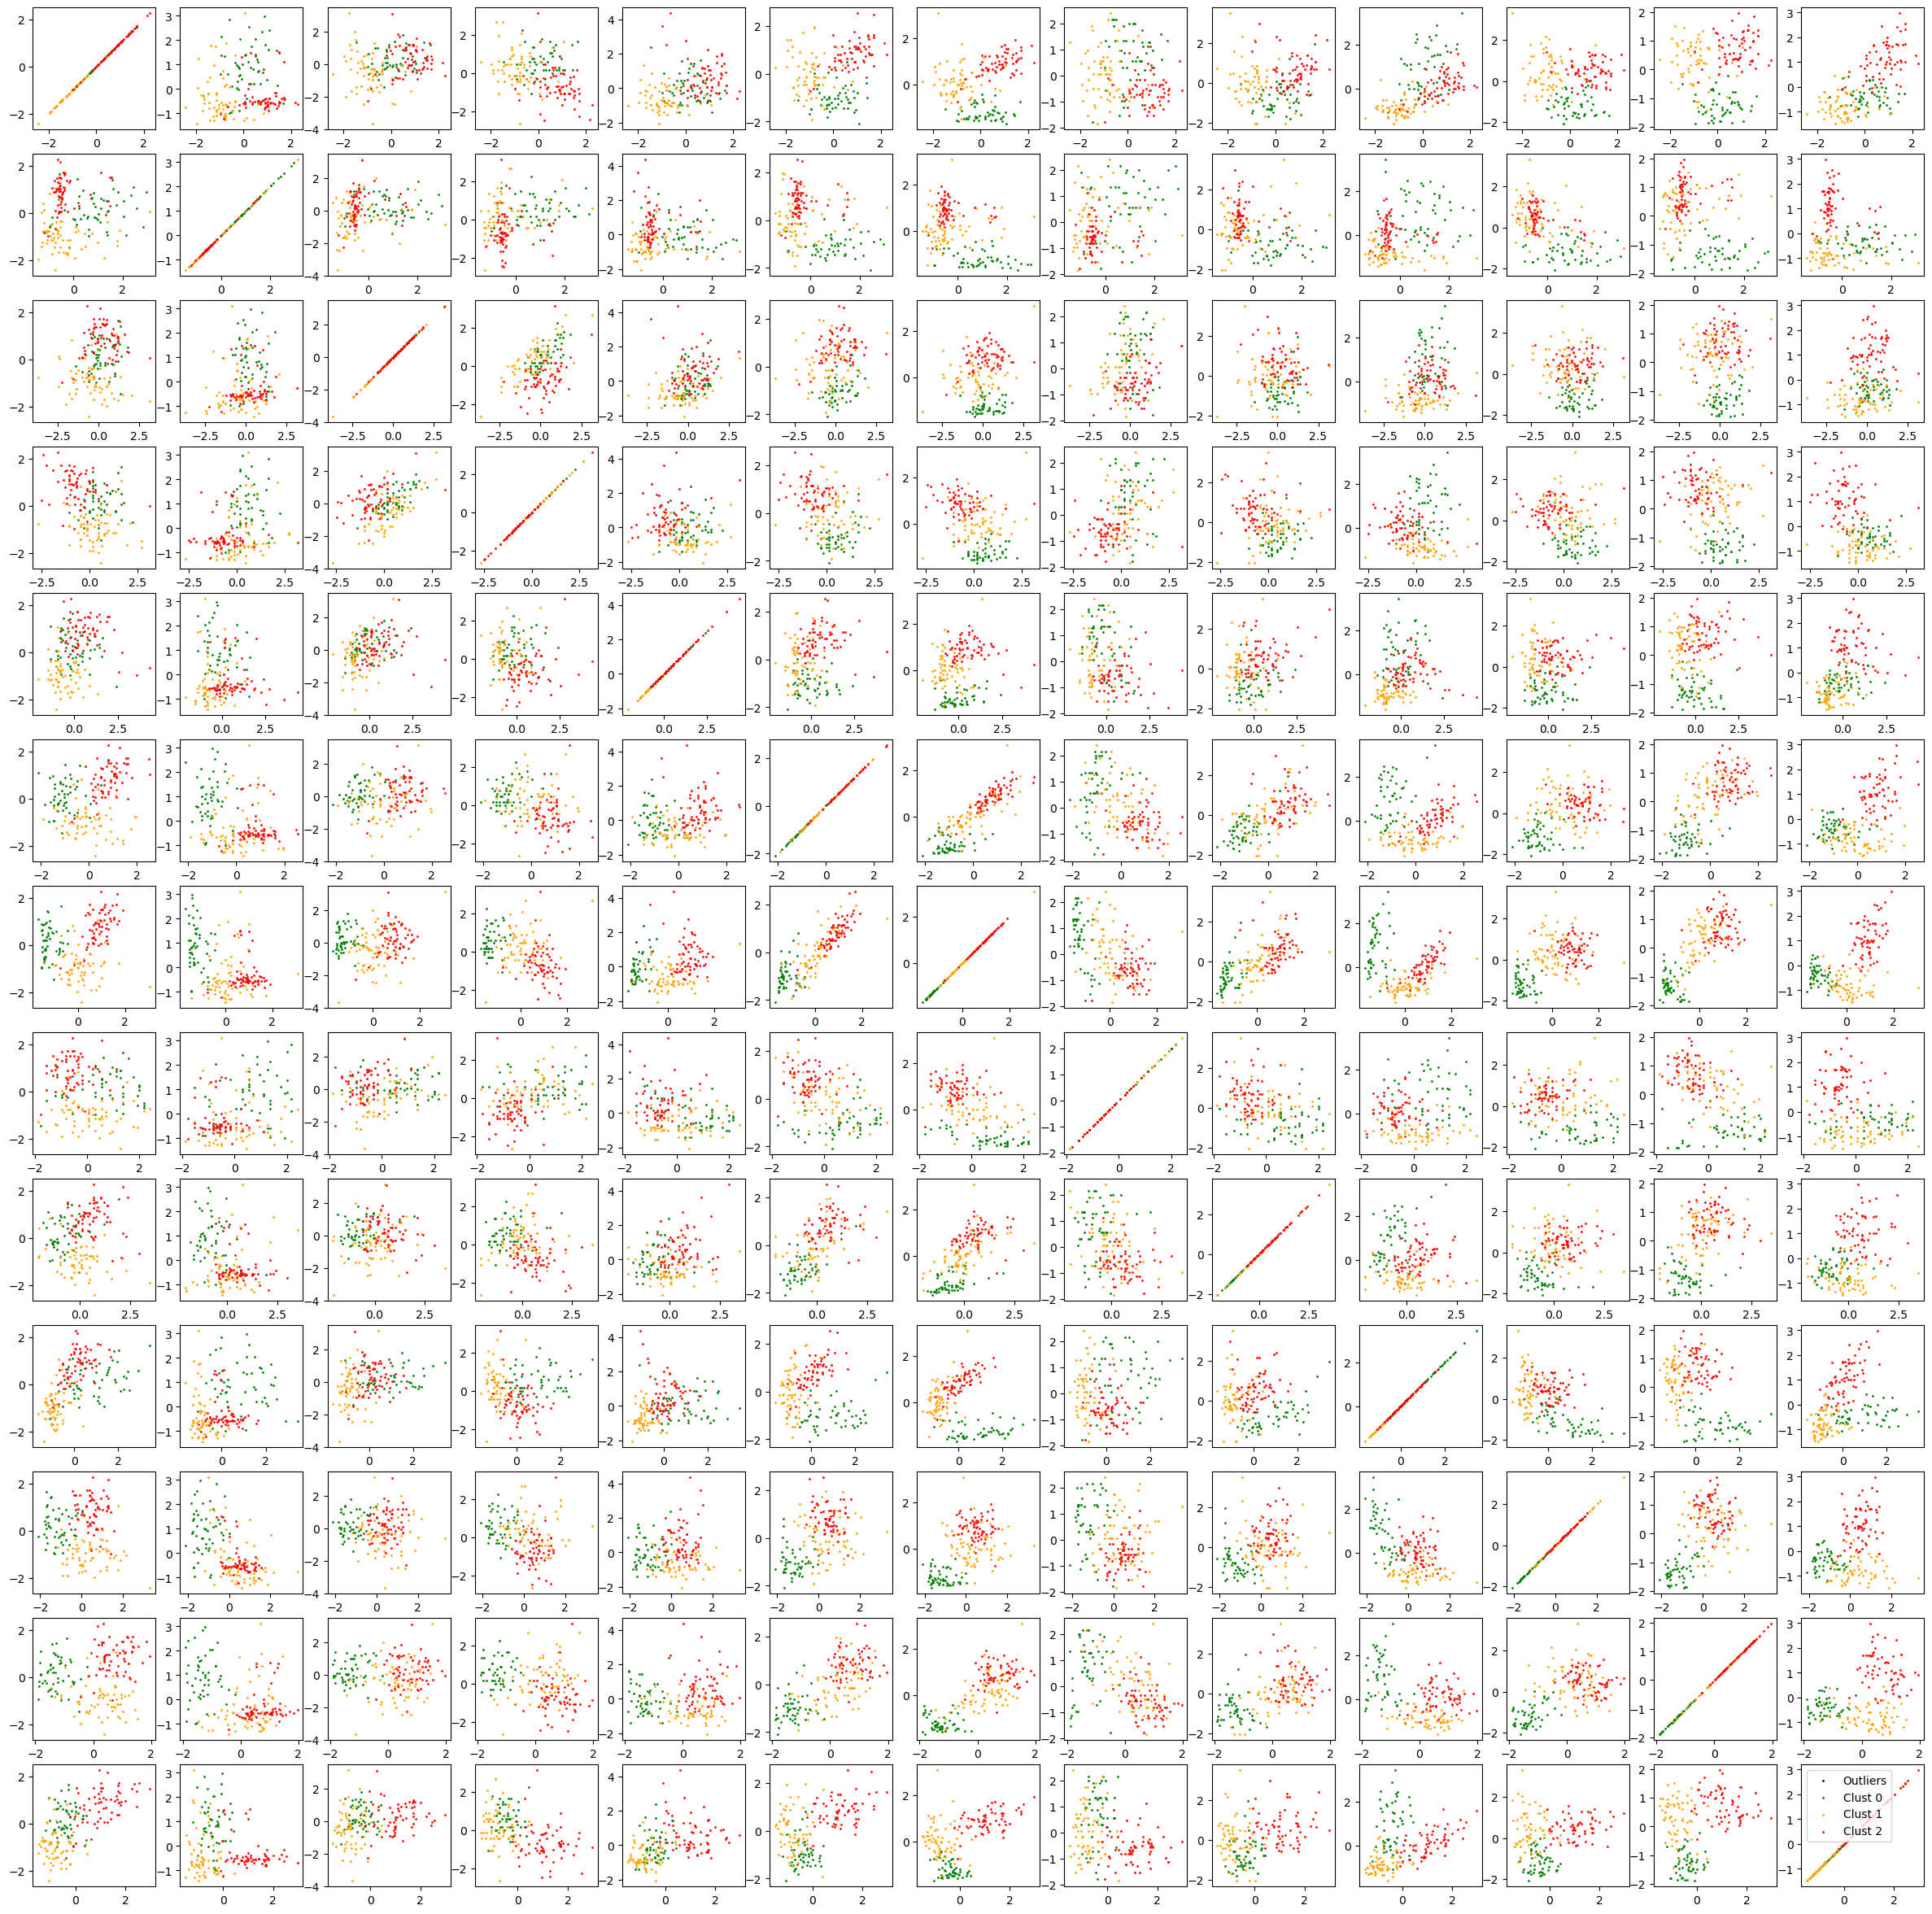

In [61]:
N_p = 13
fig, axis = plt.subplots(nrows=N_p, ncols=N_p,figsize=(30,30))
color = ['green', 'orange', 'red']
for i in range(N_p):
    for j in range(N_p):
        #Outliers :
        axis[i,j].scatter(X[spectral_clf.labels_==-1,i],X[spectral_clf.labels_==-1,j],s=1,label='Outliers',color='black')
        for c in range(3):
            axis[i,j].scatter(X[spectral_clf.labels_==c,i],X[spectral_clf.labels_==c,j],s=1,label='Clust '+str(c),color=color[c])
plt.legend()
plt.show()

In [63]:
from itertools import permutations

# As label values are not necessarily in the same order as the original, we have to check all permutations 
def all_permutations(y):
    n_c = len(set(y))
    unique_labels = np.unique(y)
    label_perms = list(permutations(unique_labels))

    permuted_arrays = []
    
    for perm in label_perms:
        # Discrete bijection :
        label_map = dict(zip(unique_labels, perm))
        
        # Apply permutation
        permuted_y = np.array([label_map[label] for label in y])
        
        permuted_arrays.append(permuted_y) 
    return permuted_arrays


def loss_fun(y,y_pred):
    n = y.size
    permuted_arrays = all_permutations(y)
    scores=np.zeros(len(permuted_arrays))
    for i in range(len(permuted_arrays)):
        scores[i] = sum(permuted_arrays[i] != y_pred)/n
    return np.amin(scores)

print(loss_fun(y,kmean_clf.labels_))
print(loss_fun(y,hierarchical_clf.labels_))
print(loss_fun(y,spectral_clf.labels_))


# For DBSCAN we can consider the error with or without outliers :

print('Error taking into account outliers')
print('Classification error DBSCAN : ',loss_fun(y,dbscan_clf.labels_))
print('Error ignoring outliers')
print('Classification error DBSCAN : ',loss_fun(y[dbscan_clf.labels_ != -1],dbscan_clf.labels_[dbscan_clf.labels_ != -1]))

0.033707865168539325
0.07303370786516854
0.03932584269662921
Error taking into account outliers
Classification error DBSCAN :  0.6067415730337079
Error ignoring outliers
Classification error DBSCAN :  0.39655172413793105


In [65]:
pca = PCA()
X_pca = pca.fit_transform(X)

n_clust = 3

kmean_clf_pca = KMeans(n_clusters=n_clust) 
dbscan_clf_pca = DBSCAN(eps=0.7,min_samples=10) 
hierarchical_clf_pca = AgglomerativeClustering(n_clusters=n_clust)
spectral_clf_pca = SpectralClustering(n_clusters=n_clust,affinity='nearest_neighbors')

kmean_clf_pca.fit(X_pca[:,:2])
dbscan_clf_pca.fit(X_pca[:,:2])
hierarchical_clf_pca.fit(X_pca[:,:2])
spectral_clf_pca.fit(X_pca[:,:2])

print(loss_fun(y,kmean_clf_pca.labels_))
print(loss_fun(y,hierarchical_clf_pca.labels_))
print(loss_fun(y,spectral_clf_pca.labels_))


# For DBSCAN we can consider the error with or without outliers :

print('Error taking into account outliers')
print('Classification error DBSCAN : ',loss_fun(y,dbscan_clf_pca.labels_))
print('Error ignoring outliers')
print('Classification error DBSCAN : ',loss_fun(y[dbscan_clf_pca.labels_ != -1],dbscan_clf.labels_[dbscan_clf_pca.labels_ != -1]))


0.033707865168539325
0.033707865168539325
0.033707865168539325
Error taking into account outliers
Classification error DBSCAN :  0.1853932584269663
Error ignoring outliers
Classification error DBSCAN :  0.5759493670886076


/Users/mounir/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


DBSCAN is very sensitive to dimension as it consider d-dimensional spheres. So parameters have to be changed while reducing dimensions.

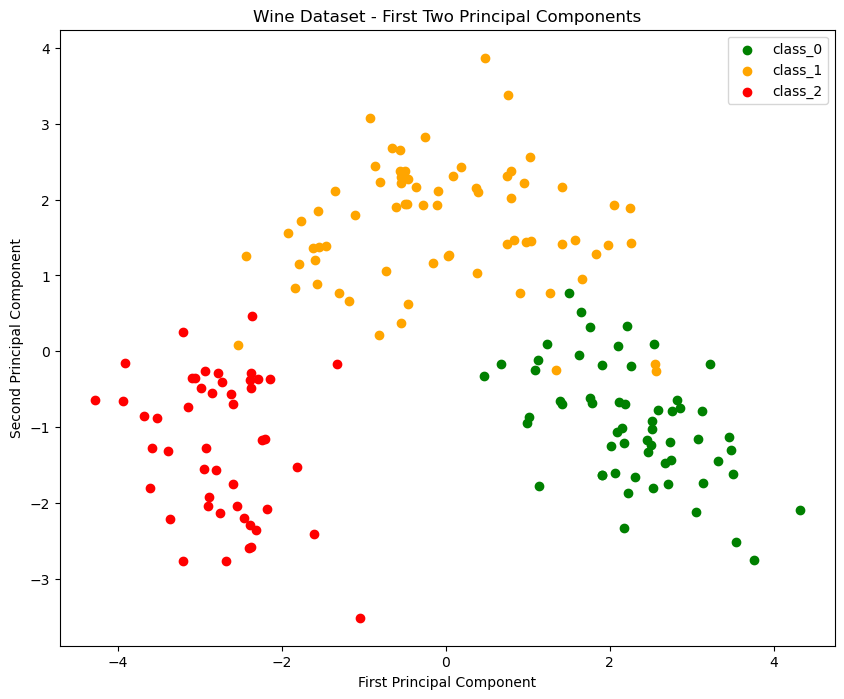

In [68]:
plt.figure(figsize=(10, 8))
colors = ['green', 'orange', 'red']
for i, c in zip(range(3), colors):
    plt.scatter(X_pca[y == i, 0], X_pca[y == i, 1], c=c, label=data_wine.target_names[i])
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.legend()
plt.title('Wine Dataset - First Two Principal Components')
plt.show()

# Function to plot clustering results
def plot_clusters(X,labels, title,ind0 = 0, ind1 = 1,n_c=3):
    plt.figure(figsize=(5, 5))
    if -1 in set(labels):
        plt.scatter(X[labels == -1, ind0], X[labels == -1, ind1], c=labels[labels==-1], label='Outliers ')
    colors = ['r', 'g', 'b']
    for i, c in zip(range(n_c), colors):
        plt.scatter(X[labels == i, ind0], X[labels == i, ind1], c=c, label='Class '+str(i))
    #plt.scatter(X[:, ind0], X[:, ind1], c=labels, cmap='viridis')
    plt.title(title)
    #plt.xlabel('Feature 1')
    #plt.ylabel('Feature 2')
    plt.xlabel('First Principal Component')
    plt.ylabel('Second Principal Component')
    plt.legend()
    #plt.colorbar()
    plt.show()
    

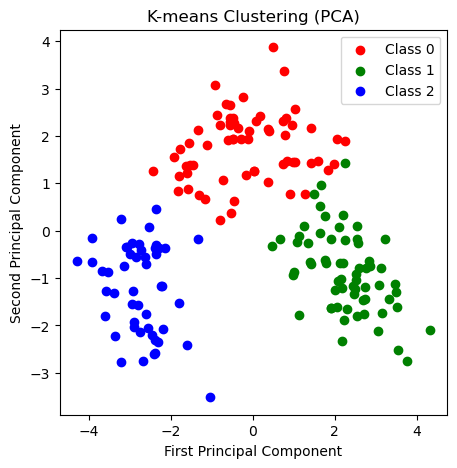

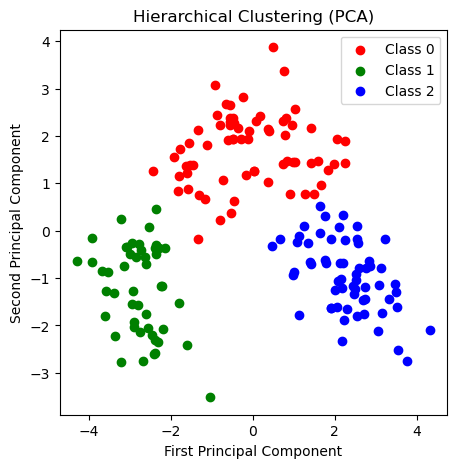

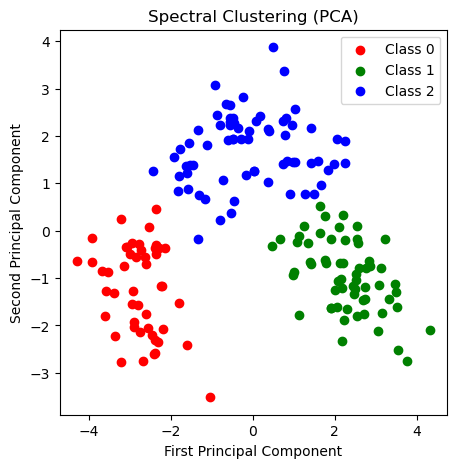

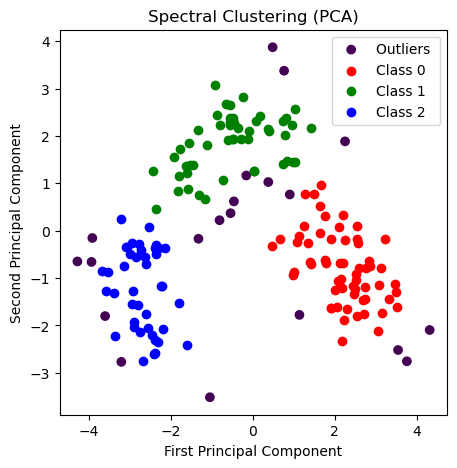

In [70]:
plot_clusters(X_pca, kmean_clf_pca.labels_, 'K-means Clustering (PCA)')
plot_clusters(X_pca, hierarchical_clf_pca.labels_, 'Hierarchical Clustering (PCA)')
plot_clusters(X_pca, spectral_clf_pca.labels_, 'Spectral Clustering (PCA)')
plot_clusters(X_pca, dbscan_clf_pca.labels_, 'Spectral Clustering (PCA)')

# Exercice 2

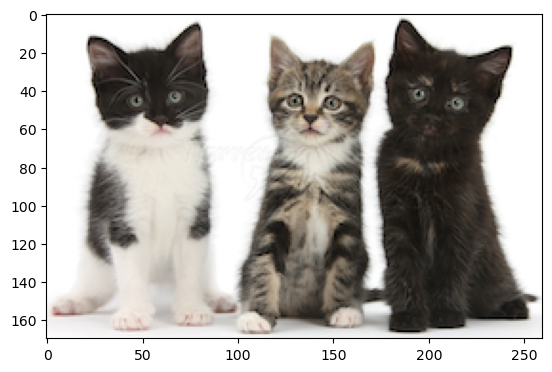

In [339]:
import matplotlib.image as pltimg

img_ensiie = pltimg.imread('ensiie_bat_09_2.jpg')
img_kitten = pltimg.imread('Three-kittens2.png')

X_ensiie = img_ensiie.reshape((img_ensiie.shape[0]*img_ensiie.shape[1],-1))
X_kitten = img_kitten.reshape((img_kitten.shape[0]*img_kitten.shape[1],-1))


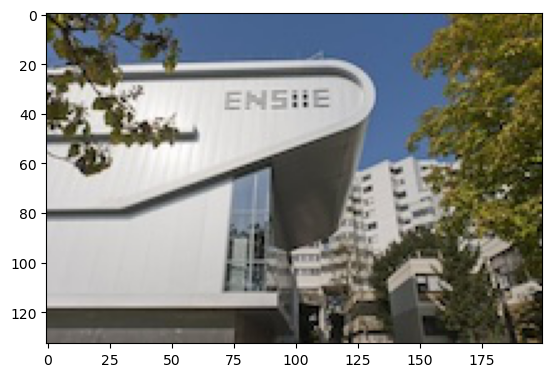

In [373]:
plt.imshow(img_ensiie)

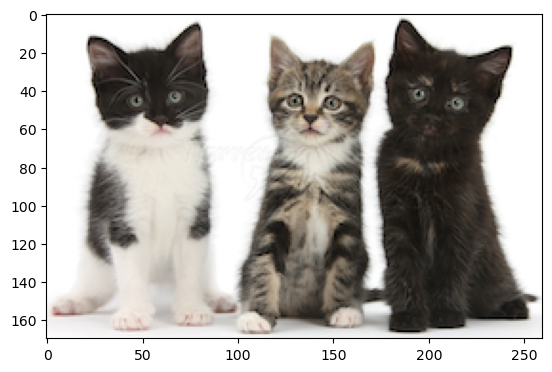

In [375]:
plt.imshow(img_kitten)

In [377]:
#No centering/scaling while working with pixel values

n_clust = 10
kmeans_ensiie = KMeans(n_clusters=n_clust)
kmeans_kitten = KMeans(n_clusters=n_clust)

kmeans_ensiie.fit(X_ensiie)
y_ensiie =  kmeans_ensiie.predict(X_ensiie)
img_ensiie_clust = y_ensiie.reshape((img_ensiie.shape[0],img_ensiie.shape[1]))


kmeans_kitten.fit(X_kitten)
y_kitten =  kmeans_kitten.predict(X_kitten)
img_kitten_clust = y_kitten.reshape((img_kitten.shape[0],img_kitten.shape[1]))

/Users/mounir/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/mounir/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


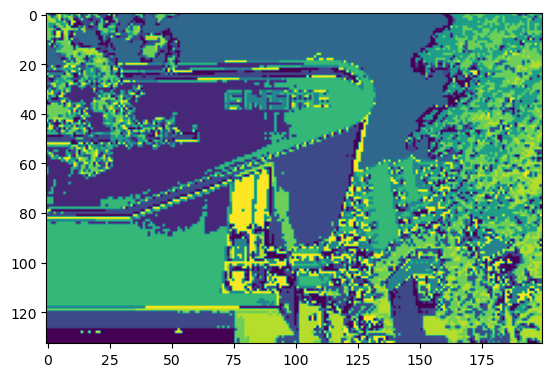

In [379]:
plt.imshow(img_ensiie_clust)

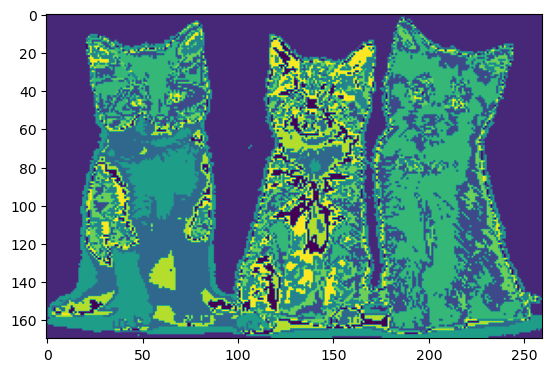

In [381]:
plt.imshow(img_kitten_clust)

In [383]:
y_ensiie_sm = np.zeros((y_ensiie.size,img_ensiie.shape[2]))
y_kitten_sm = np.zeros((y_kitten.size,img_kitten.shape[2]))
for k in range(y_ensiie.size):
    y_ensiie_sm[k] = kmeans_ensiie.cluster_centers_[kmeans_ensiie.labels_[k]]
for k in range(y_kitten.size):
    y_kitten_sm[k] = kmeans_kitten.cluster_centers_[kmeans_kitten.labels_[k]]


y_ensiie_sm = y_ensiie_sm.reshape((img_ensiie.shape[0],img_ensiie.shape[1],img_ensiie.shape[2])).astype(int)
y_kitten_sm = y_kitten_sm.reshape((img_kitten.shape[0],img_kitten.shape[1],img_kitten.shape[2]))

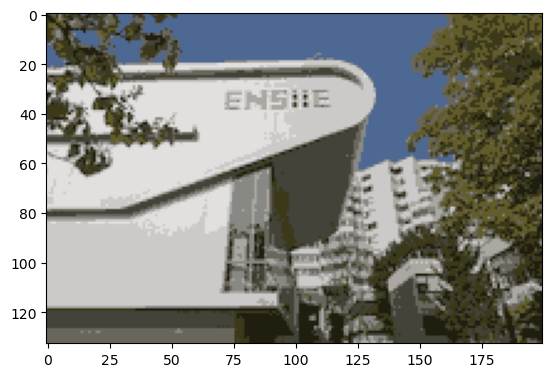

In [385]:
plt.imshow(y_ensiie_sm)

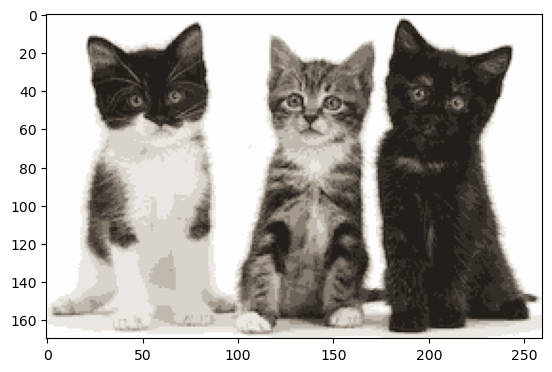

In [387]:
plt.imshow(y_kitten_sm)

In [393]:
Cte = 10

XX_ensiie = np.zeros((img_ensiie.shape[0]*img_ensiie.shape[1],3))
XX_kitten = np.zeros((img_kitten.shape[0]*img_kitten.shape[1],3))

# Recover pixel positions from indexes of flattened array  
a,b = np.unravel_index(np.arange(y_ensiie.size),(img_ensiie.shape[0],img_ensiie.shape[1]))

for k in range(y_ensiie.size):
    XX_ensiie[k,:] = y_ensiie[k],a[k]/Cte,b[k]/Cte

# Recover pixel positions from indexes of flattened array  
a,b = np.unravel_index(np.arange(y_kitten.size),(img_kitten.shape[0],img_kitten.shape[1]))

for k in range(y_kitten.size):
    XX_kitten[k,:] = y_kitten[k],a[k]/Cte,b[k]/Cte


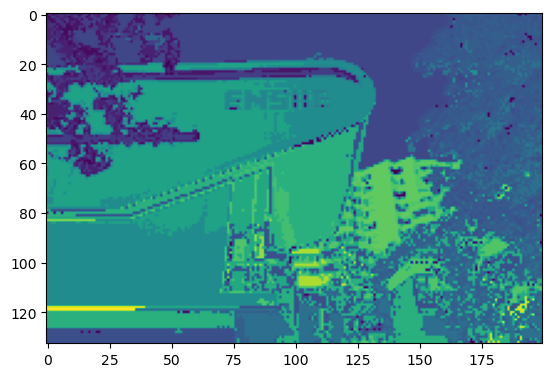

In [399]:
dbscan_ensiie = DBSCAN(eps=0.99, min_samples=10)
dbscan_ensiie.fit(XX_ensiie)
img_ensiie_clust2 = dbscan_ensiie.labels_.reshape((img_ensiie.shape[0],img_ensiie.shape[1]))
plt.imshow(img_ensiie_clust2)

/Users/mounir/anaconda3/lib/python3.10/site-packages/sklearn/manifold/_spectral_embedding.py:274: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(
/Users/mounir/anaconda3/lib/python3.10/site-packages/sklearn/manifold/_spectral_embedding.py:274: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


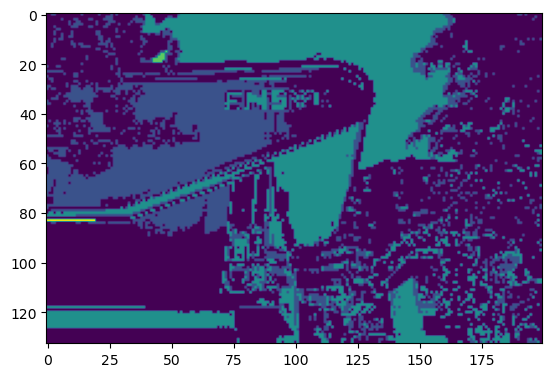

In [402]:
# It can take a few minutes to compute nearest neighbors
n_clust = 5
spectral_ensiie = SpectralClustering(n_clusters=n_clust, affinity='nearest_neighbors').fit(XX_ensiie)
spectral_ensiie.fit(XX_ensiie)
img_ensiie_clust3 = spectral_ensiie.labels_.reshape((img_ensiie.shape[0],img_ensiie.shape[1]))
plt.imshow(img_ensiie_clust3)

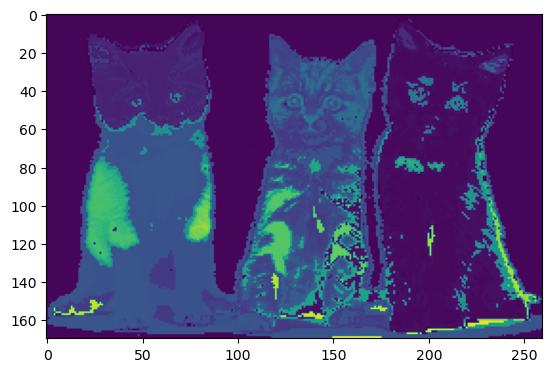

In [404]:
dbscan_kitten = DBSCAN(eps=0.99, min_samples=10)
dbscan_kitten.fit(XX_kitten)
img_kitten_clust2 = dbscan_kitten.labels_.reshape((img_kitten.shape[0],img_kitten.shape[1]))
plt.imshow(img_kitten_clust2)

/Users/mounir/anaconda3/lib/python3.10/site-packages/sklearn/manifold/_spectral_embedding.py:274: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(
/Users/mounir/anaconda3/lib/python3.10/site-packages/sklearn/manifold/_spectral_embedding.py:274: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


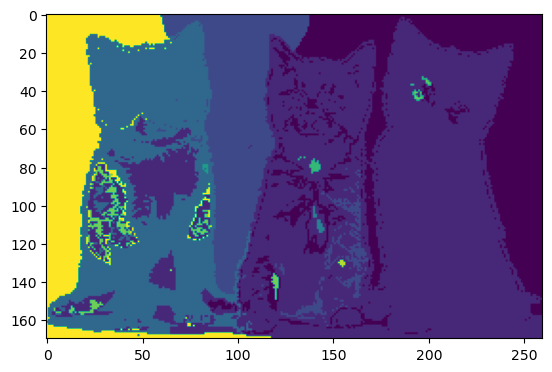

In [408]:
# It can take a few minutes to compute nearest neighbors
# Amount of nearest neighbors to consider while constructing affinity matrix can be adjusted using the parameter 'n_neighbors'
n_clust = 10
spectral_kitten = SpectralClustering(n_clusters=n_clust, affinity='nearest_neighbors').fit(XX_kitten)
spectral_kitten.fit(XX_kitten)
img_kitten_clust3 = spectral_kitten.labels_.reshape((img_kitten.shape[0],img_kitten.shape[1]))
plt.imshow(img_kitten_clust3)